## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [1]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [2]:
df_happiness=pd.read_csv(HAPPINESS_DATASET)
print(df_happiness.shape)
df_happiness.head(5)

(135, 8)


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [3]:
df_countries=pd.read_csv(COUNTRIES_DATASET)
print(df_countries.shape)
df_countries.head()

(135, 4)


,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [4]:
df_countries.country_name=df_countries.country_name.str.capitalize()
country_features=pd.merge(df_countries,df_happiness.rename({'country':'country_name'},axis=1),on='country_name',how='left')

In [5]:
country_features.head()

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,647500,31056997,"36,0",2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,28748,3581655,"86,5",4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,2381740,32930091,"70,0",5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,2766890,39921833,"97,1",5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,29800,2976372,"98,6",4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [6]:
country_features.sort_values(by='happiness_score',ascending=False).head(10)

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
38,Finland,338145,5231372,"100,0",7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe
31,Denmark,43094,5450661,"100,0",7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe
115,Switzerland,41290,7523934,"99,0",7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe
50,Iceland,103000,299388,"99,9",7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe
92,Norway,323802,4610820,"100,0",7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe
87,Netherlands,41526,16491461,"99,0",7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe
114,Sweden,449964,9016596,"99,0",7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe
6,Austria,83870,8192880,"98,0",7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe
72,Luxembourg,2586,474413,"100,0",7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe
21,Canada,9984670,33098932,"97,0",7.2321,0.927177,73.601601,0.933913,0.124771,0.390843,North America and ANZ


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# 1
country_features.groupby('world_region',as_index=False)[['happiness_score']].mean().sort_values(by='happiness_score',ascending=False)

,world_region,happiness_score
5,North America and ANZ,7.227450
9,Western Europe,6.957032
3,Latin America and Caribbean,5.898041
0,Central and Eastern Europe,5.812969
7,Southeast Asia,5.517788
2,East Asia,5.483633
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.079400
8,Sub-Saharan Africa,4.382559
6,South Asia,4.360700


In [8]:
regions_by_country_count=country_features.groupby('world_region',as_index=False)[['country_name']].count().rename({'country_name':'country_count'},axis=1).sort_values(by='country_count')
regions_by_country_count

,world_region,country_count
5,North America and ANZ,2
2,East Asia,3
6,South Asia,5
7,Southeast Asia,8
1,Commonwealth of Independent States,12
0,Central and Eastern Europe,13
4,Middle East and North Africa,14
3,Latin America and Caribbean,17
9,Western Europe,19
8,Sub-Saharan Africa,29


The first region has only a few countries! What are them and what is their score?

In [9]:
region_with_least_country=regions_by_country_count[regions_by_country_count.country_count==regions_by_country_count.country_count.min()].iloc[0]['world_region']
print(region_with_least_country)

country_features[country_features.world_region==region_with_least_country][['world_region','country_name','happiness_score']]

North America and ANZ


,world_region,country_name,happiness_score
5,North America and ANZ,Australia,7.2228
21,North America and ANZ,Canada,7.2321


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [10]:
country_features.literacy=country_features.literacy.str.replace(',','.').astype(float)
country_features[country_features.literacy==100]

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
5,Australia,7686850,20264082,100.0,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ
31,Denmark,43094,5450661,100.0,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe
38,Finland,338145,5231372,100.0,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe
72,Luxembourg,2586,474413,100.0,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe
92,Norway,323802,4610820,100.0,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe


In [11]:
country_features[['world_region','country_name','happiness_score']].apply((lambda x:print(f'{x.world_region} - {x.country_name}({x.happiness_score})')) ,axis=1);

South Asia - Afghanistan(2.566900015)
Central and Eastern Europe - Albania(4.882699966000001)
Middle East and North Africa - Algeria(5.005099773)
Latin America and Caribbean - Argentina(5.974699974)
Commonwealth of Independent States - Armenia(4.676799774)
North America and ANZ - Australia(7.222799778)
Western Europe - Austria(7.294199944)
Commonwealth of Independent States - Azerbaijan(5.164800167)
Middle East and North Africa - Bahrain(6.227300167)
South Asia - Bangladesh(4.832799911)
Commonwealth of Independent States - Belarus(5.539899826)
Western Europe - Belgium(6.863500117999999)
Sub-Saharan Africa - Benin(5.21600008)
Latin America and Caribbean - Bolivia(5.747499942999999)
Sub-Saharan Africa - Botswana(3.478899956)
Latin America and Caribbean - Brazil(6.375599861)
Central and Eastern Europe - Bulgaria(5.101500034)
nan - Burkina faso(nan)
Sub-Saharan Africa - Burundi(3.775300026)
Southeast Asia - Cambodia(4.8484001160000005)
Sub-Saharan Africa - Cameroon(5.084899902)
North Ameri

What is the global average?

In [12]:
print(country_features.literacy.mean())
print(country_features.literacy.median())

81.85112781954888
90.9


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [13]:
round(country_features[country_features.literacy<50].country_name.nunique()/country_features.country_name.nunique(),2)

0.12

Print the raw number and the percentage of world population that is illiterate.

In [14]:
illiterate_countries=country_features[country_features.literacy<50].country_name
illiterate_population=country_features[country_features.country_name.isin(illiterate_countries)].population.sum()
illiterate_population/country_features.population.sum()
print('Illiterate population: {} ({:.3f}%)'.format(illiterate_population, illiterate_population/country_features.population.sum()))


Illiterate population: 580572946 (0.094%)


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [15]:
country_features['population_density']=country_features.population/country_features.area

What is the happiness score of the 3 countries with the lowest population density?

In [16]:
country_features.sort_values(by='population_density')[['country_name','happiness_score','population_density']].head(3)

,country_name,happiness_score,population_density
83,Mongolia,5.4562,1.810751
5,Australia,7.2228,2.636201
14,Botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

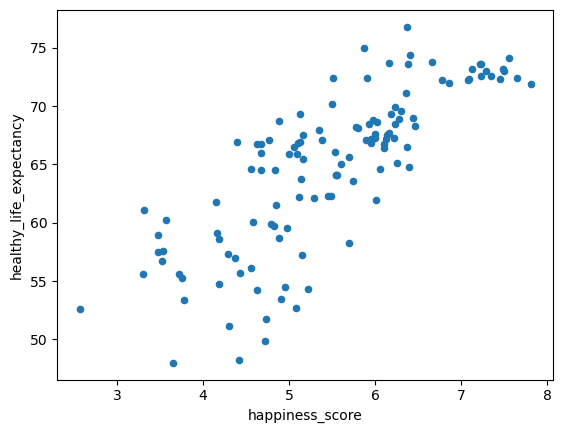

In [17]:
import matplotlib.pyplot as plt
country_features.plot(kind='scatter',x='happiness_score',y='healthy_life_expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.

# Further Analysis?

## 3 countributing factors to the happiness score

In [53]:
columns=['literacy', 'social_support', 'healthy_life_expectancy', 'freedom_of_choices', 'generosity', 'perception_of_corruption']
columns.append('happiness_score')

In [54]:
correlation=country_features[columns].corr()[['happiness_score']].sort_values(by='happiness_score',ascending=False).iloc[1:4]
correlation

,happiness_score
healthy_life_expectancy,0.787138
social_support,0.772333
literacy,0.602380


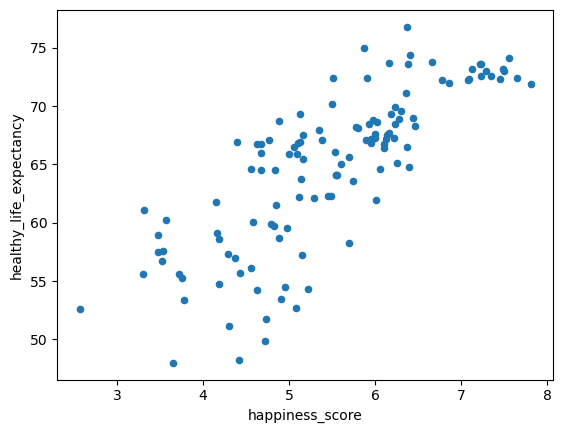

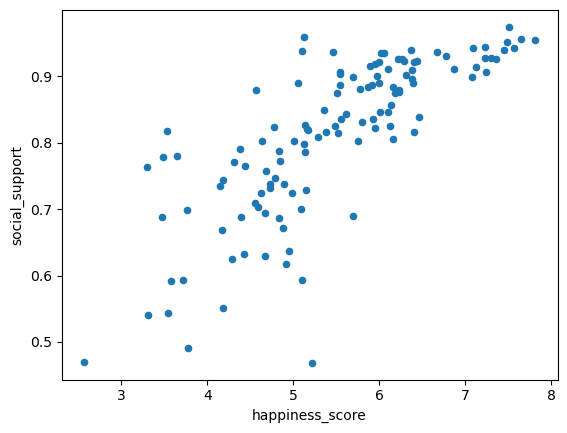

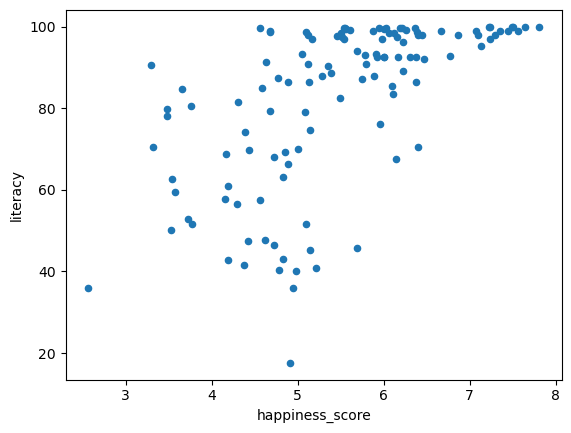

In [56]:
for col in ['healthy_life_expectancy','social_support','literacy']:
    country_features.plot(kind='scatter',x='happiness_score',y=col)
plt.show()

## 3 countries with the highest score in all above factors

In [67]:
print('Happiness score:')
countries_by_happiness=country_features.sort_values(by='happiness_score',ascending=False).head(10)
countries_by_happiness.apply((lambda x:print(f'{x.country_name} - {x.happiness_score}')) ,axis=1);
print('\nHealthy life expectancy:')
countries_by_life_expectancy=country_features.sort_values(by='healthy_life_expectancy',ascending=False).head(10)
countries_by_life_expectancy.apply((lambda x:print(f'{x.country_name} - {x.healthy_life_expectancy}')) ,axis=1);
print('\nSocial support:')
countries_by_social_support=country_features.sort_values(by='social_support',ascending=False).head(10)
countries_by_social_support.apply((lambda x:print(f'{x.country_name} - {x.social_support}')) ,axis=1);
print('\nLiteracy:')
countries_by_literacy=country_features.sort_values(by='literacy',ascending=False).head(10)
countries_by_literacy.apply((lambda x:print(f'{x.country_name} - {x.literacy}')) ,axis=1);

Happiness score:
Finland - 7.808700085
Denmark - 7.645599842
Switzerland - 7.559899807000001
Iceland - 7.504499912000001
Norway - 7.487999916000001
Netherlands - 7.448900223
Sweden - 7.353499889
Austria - 7.294199944
Luxembourg - 7.237500191
Canada - 7.23210001

Healthy life expectancy:
Singapore - 76.80458069
Japan - 75.00096893
Spain - 74.40270996
Switzerland - 74.10244751
France - 73.80193329
Cyprus - 73.70222473
Australia - 73.60453796
Italy - 73.60168457
Canada - 73.60160065
Norway - 73.20078278

Social support:
Iceland - 0.974669576
Turkmenistan - 0.958966196
Denmark - 0.955990791
Finland - 0.954329729
Norway - 0.952486575
Australia - 0.944854617
Switzerland - 0.942846596
Ireland - 0.942081571
Slovenia - 0.939575672
Netherlands - 0.93913883

Literacy:
Luxembourg - 100.0
Norway - 100.0
Australia - 100.0
Finland - 100.0
Denmark - 100.0
Czech republic - 99.9
Iceland - 99.9
Poland - 99.8
Estonia - 99.8
Latvia - 99.8


In [73]:
best_countries=pd.merge(
    pd.merge(
        countries_by_happiness[['country_name','social_support']],
        countries_by_life_expectancy[['country_name','literacy']],
        how='inner',
        on='country_name'
    ),
    pd.merge(
        countries_by_happiness[['country_name','happiness_score']],
        countries_by_life_expectancy[['country_name','healthy_life_expectancy']],
        how='inner',
        on='country_name'
    ),
    how='inner',
    on='country_name'
)

In [74]:
best_countries

,country_name,social_support,literacy,happiness_score,healthy_life_expectancy
0,Switzerland,0.942847,99.0,7.5599,74.102448
1,Norway,0.952487,100.0,7.4880,73.200783
2,Canada,0.927177,97.0,7.2321,73.601601
